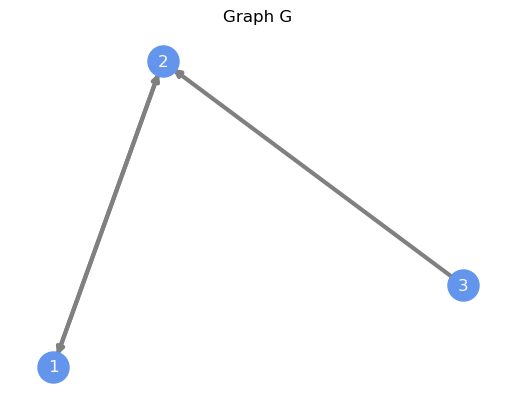

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pygraphviz

# Definicija grafa
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (3, 2), (2, 1)])

# Crtanje grafa
pos = nx.spectral_layout(G)  # Pozicioniranje čvorova
nx.draw_networkx_nodes(G, pos, node_color='cornflowerblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=3)
nx.draw_networkx_labels(G, pos, font_color='snow', font_size=12)
plt.title("Graph G")
plt.axis('off')
plt.show()

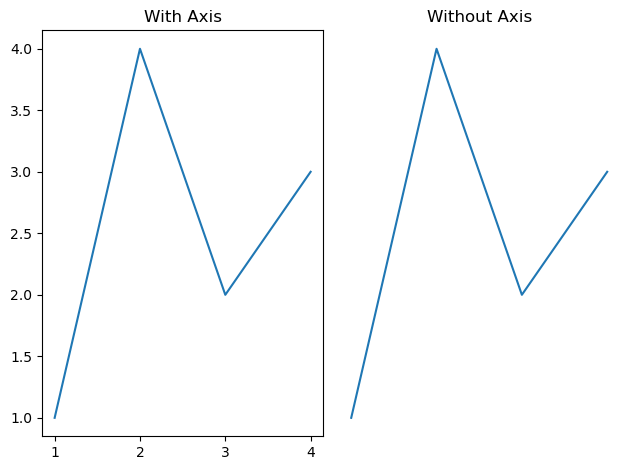

In [3]:
# Plot with axis displayed
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title("With Axis")

# Plot with axis turned off
plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title("Without Axis")
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
import random
def scale_free_directed_graph(n, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, seed=None):
    G = nx.DiGraph()
    G.add_node(0)

    nodes = list(G.nodes())
    cursor = 0
    random.seed(seed)

    while len(G) < n:
        r = random.random()

        if r < alpha:
            v = cursor
            cursor += 1
            w = random.choice(nodes)

        elif r < alpha + beta:
            v = random.choice(nodes)
            w = random.choice(nodes)

        else:
            v = random.choice(nodes)
            w = cursor
            cursor += 1

        if v != w and not G.has_edge(v, w):
            G.add_edge(v, w)

        nodes = list(G.nodes())

    return G

* `nx.circular_layout`: Positions nodes on a circle.
* `nx.random_layout`: Assigns random positions to nodes within a bounded area.
* `nx.shell_layout`: Places nodes in concentric circles based on their connectivity.
* `nx.spectral_layout`: Uses the eigenvectors of the graph Laplacian to position the nodes.
* `nx.spring_layout`: Uses a force-directed layout algorithm to simulate the behavior of physical springs and repulsive forces between nodes.

In [5]:
def _Laplace_inDegree(G):
  A = nx.adjacency_matrix(G)
  A = np.transpose(A)
  D = np.diag(A @ np.ones(np.size(A,1)).transpose())
  return D-A;

In [6]:
def mu_(alpha, beta, gamma):
    def mu(s):
        return (s*s-1j*s*beta)/(gamma + 1j*alpha*s);
    return mu;

In [7]:
def get_Fi_norm(G):
    L = _Laplace_inDegree(G)
    ndim = np.shape(L)[0];
    T,Z,dim_Ker_L = la.schur(L, sort = lambda x: abs(x)<1e-12)
    max_diagonal = np.max(np.abs(np.diag(T)))
    print("- - - - - Računam Schurovu dekompoziciju")
    V = Z[:,dim_Ker_L:]
    EYE = np.diag(np.ones(ndim - dim_Ker_L))
    
    def FF_(i,alpha,beta,gamma):
        alpha_2 = alpha*alpha
        gamma_2 = gamma*gamma
        M = mu_(alpha,beta,gamma)
        VTei = V.T.conj()[:,i-1]
        Z_Tei = Z.T.conj()[dim_Ker_L:,i-1]
        
        def Fi(s):
            if (s == 0):
                #A = T[dim_Ker_L:,dim_Ker_L:] #uzmemo T_22
                x = la.solve_triangular(T[dim_Ker_L:,dim_Ker_L:],VTei)  #solve_triangular poziva
                #LAPACK rutinu za trokutasti sustav
                nrm =la.norm(V @ x /gamma)
                F = nrm
            else:
                x = la.solve_triangular(T[dim_Ker_L:,dim_Ker_L:] - EYE*M(s),Z_Tei)
                F = la.norm(V @ x)/np.sqrt(s*s*alpha_2 + gamma_2)
            return F;
        return Fi;
    return FF_, dim_Ker_L, ndim, max_diagonal;

In [8]:
import networkx as nx

import numpy as np
from scipy.sparse import csgraph
import scipy.signal as signal
import scipy.linalg as la
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math
import time

In [9]:
def generate_graphs(n):
    A = nx.gnr_graph(n, 0.5)    
    descriptionA = "gnr_graph(" + str(n) + ", 0.5)"
    
    B = nx.gnc_graph(n)
    descriptionB = "gnc_graph(" + str(n) + ")"
    
    C = nx.random_k_out_graph(n, 4, 50.0, self_loops=False, seed=None)
    descriptionC = "random_k_out_graph(" + str(n) + "4, 50.0, self_loops=False, seed=None)"
        
    D = scale_free_directed_graph(n)
    descriptionD = "scale_free_directed_graph("+str(n)+")"
    
    E = nx.gn_graph(n)
    descriptionE = "gn_graph(" + str(n) + ")"
    
    F = nx.gn_graph(n, kernel=lambda x: x ** 1.5)
    descriptionF = "gn_graph(" + str(n) + ", kernel=lambda x: x ** 1.5)"
    
    G = nx.gn_graph(n, kernel=lambda x: math.exp(x*1.4))
    descriptionG = "gn_graph(" + str(n) + ", kernel=lambda x: math.exp(x*1.4))"    
    
    #H = nx.fast_gnp_random_graph(n,0.6,seed=None, directed=True)
    #descriptionH = "fast_gnp_random_graph("+str(n)+",0.6,seed = None, directed = True)"
    
    #I = nx.gnp_random_graph(n,0.2,seed=None, directed=True)
    #descriptionI = "gnp_random_graph("+str(n)+",0.2,seed = None, directed = True)"
    
    #J = nx.dense_gnm_random_graph(n,n+6,seed=None)
    #descriptionJ = "dense_gnm_random_graph("+str(n)+","+str(n+6)+",seed=None, directed=True)"
    
    #K = nx.gnm_random_graph(n, n+6, seed=None, directed=True)
    #descriptionK = "gnm_random_graph("+str(n)+", "+str(n+6)+", seed=None, directed=True)"
    
    #L = nx.connected_watts_strogatz_graph(n, n-2, 0.2, tries=100, seed=None)
    #descriptionL = "connected_watts_strogatz_graph("+str(n)+", "+str(n-2)+", 0.2, tries=100, seed=None)"

    
    
    #A = scale_free_directed_graph(n)
    #B = scale_free_directed_graph(n)
    #E = scale_free_directed_graph(n)
    #F = scale_free_directed_graph(n)
    #G = scale_free_directed_graph(n)
    
    #return [(A,descriptionD),(B,descriptionD),(C,descriptionC),(D,descriptionD),(E,descriptionD),(F,descriptionD),(G,descriptionD)]
    return [(A,descriptionA),(B,descriptionB),(C,descriptionC),(D,descriptionD),(E,descriptionE),(F,descriptionF),(G,descriptionG)]#,(H,descriptionH),(I,descriptionI),(J,descriptionJ),(K,descriptionK),(L,descriptionL)]
    #return [(C,descriptionC),(D,descriptionD)]
    #return [(A,descriptionA),(C,descriptionC),(D,descriptionD),(E,descriptionE)]

In [10]:
def plot_graph(G):
    Graph = G[0]
    plt.figure(figsize=(3,3))
    #pos = nx.shell_layout(Graph)
    pos = nx.nx_agraph.graphviz_layout(Graph, prog='dot')

    nodes = nx.draw_networkx_nodes(Graph, pos, node_size=100)
    edgclr = (224/255.0,229/255.0,255/255.0)
    nx.draw_networkx_edges(Graph, pos,edge_color=edgclr)
    
    #labels = {node: node for node in Graph.nodes()}
    #nx.draw_networkx_labels(Graph, pos, labels=labels, font_color='black', verticalalignment='center')
    
    plt.title(G[1])
    plt.axis('off')
    plt.show()

In [ ]:
def obj_fun(s):
    return -Fi(s)

#CounterExamples_1 = [] # Nelder-Mead i argmax nisu jednaki - (G,s_opt)

alpha = 1
beta = 1
start_time = time.time()

N = 50# Number of iterations
n = 8  # Size of the graph

for j in range(N):
    n = j%10+4
    GRAPHS = generate_graphs(n)
    #C = nx.random_k_out_graph(n, j+1, 50.0, self_loops=False, seed=None)
    #descriptionC = "random_k_out_graph(" + str(n) + ", k = "+str(j+1)+", 50.0, self_loops=False, seed=None)"
    #D = nx.random_k_out_graph(n, j%14+1, 70.0, self_loops=False, seed=None)
    #descriptionD = "random_k_out_graph(" + str(n) + ", k = "+str(j%14+1)+", 50.0, self_loops=False, seed=None)"
    #GRAPHS = [(C, descriptionC),(D, descriptionD)]
    for G in GRAPHS:
        #    plot_graph(G)
        if not nx.is_weakly_connected(G[0]):
            continue
        print(j,"\nNovi krug.")
        #plot_graph(G)
        start_time_Graph = time.time()
        sys_f, Kernel_dim, ndim, L_sigma = get_Fi_norm(G[0])
        print("Tip grafa: ",G[1])
        #print("- - - - - Najveća svojstvena vrijednost: ",L_sigma)
        x0 = 0.1
        left_end = 0
        right_end = L_sigma*10
        spacing0 = 0.001
        spacing1 = 0.1
        bounds = [(left_end,right_end)]

        # variramo parametar gamma
        for k in range(1,11):
            start_time_gamma = time.time()
            gamma = k/10
            now = time.time()
            obj_values = []
            norm_values = []
            optimal_s = []
            norm0_values = []
            ranges = []
            indexi = []
            args = []
            not_in_list = True

            for i in range(ndim):
                Fi = sys_f(i,alpha,beta,gamma)
                res = minimize(obj_fun, x0, bounds=bounds, method='Nelder-Mead')
                s_opt = res.x[0]
                norm = -res.fun # spremi vrijednost maximuma
                norm_values.append(norm) # iznosi normi iz Nelder-Meada

                if (s_opt == 0.0):
                    s_range = np.arange(left_end,right_end, spacing1)
                else:
                    s_range = np.arange(left_end,s_opt, spacing0)
                    s_range = np.concatenate((s_range, np.arange(s_opt,s_opt*5, spacing0 )))
                    #s_range = np.concatenate((s_range, np.arange(s_opt*5,right_end, spacing1 )))

                vals = [Fi(s) for s in s_range]
                maxi = max(vals)
                arg = vals.index(maxi)

                if (arg != 0) and not_in_list:
                    not_in_list = False
                    indexi.append(i)
                    ranges.append(s_range)
                    optimal_s.append(s_opt) # spremljena točka s za koju se postiže min
                    #norm0_values.append(la.norm(Fi(0))) # iznosi norme u nuli.
                    obj_values.append(vals) # spremljen graf of Fi duž domene s
                    args.append(arg)
                    #print("     Gamma =",gamma)
                    poruka = "Nađen kontraprimjer. gamma = " + str(gamma) + \
                            "    (i, s_opt, s_range[arg], arg) = " + str(i) + \
                            "," + str(s_opt) + ", " + str(s_range[arg]) + ", " + str(arg)
                        #print("       ",poruka)  
                elif (s_opt != s_range[arg]) and not_in_list:
                    not_in_list = False
                    indexi.append(i)
                    ranges.append(s_range)
                    optimal_s.append(s_opt) # spremljena točka s za koju se postiže min
                    #norm0_values.append(la.norm(Fi(0))) # iznosi norme u nuli.
                    obj_values.append(vals) # spremljen graf of Fi duž domene s
                    args.append(arg)
                    #print("     Gamma =",gamma)
                    poruka = "Nađen kontraprimjer. Nelder-Mead zapeo u lok. ekstremu. gamma = " + str(gamma) + \
                            "    (i, s_opt, s_range[arg], arg) = " + str(i) + \
                            "," + str(s_opt) + ", " + str(s_range[arg]) + ", " + str(arg)
                        #print("       ",poruka)                   

            if not not_in_list:
                CounterExamples_1.append((G[0],G[1],gamma,indexi,optimal_s, ranges, obj_values, args, poruka, norm_values))
                print("       ",poruka)
                plot_graph(G)
            end_time_gamma = time.time()
                #print("     Vrijeme za gamma =",gamma,": {:.4f} sec".format(end_time_gamma - start_time_gamma))

        end_time_Graph = time.time()
        print("- - - - - Vrijeme izvršavanja za jedan graf: {:.4f} sec".format(end_time_Graph - start_time_Graph))

In [ ]:
def obj_fun(s):
    return -Fi(s)

#CounterExamples_1 = [] # Nelder-Mead i argmax nisu jednaki - (G,s_opt)

alpha = 1
beta = 1
start_time = time.time()

N = 50# Number of iterations
n = 6  # Size of the graph

for j in range(N):
    print(j)
    GRAPHS = generate_graphs(n)
    #C = nx.random_k_out_graph(n, j+1, 50.0, self_loops=False, seed=None)
    #descriptionC = "random_k_out_graph(" + str(n) + ", k = "+str(j+1)+", 50.0, self_loops=False, seed=None)"
    #D = nx.random_k_out_graph(n, j%8+1, 70.0, self_loops=False, seed=None)
    #descriptionD = "random_k_out_graph(" + str(n) + ", k = "+str(j%8+1)+", 50.0, self_loops=False, seed=None)"
    #GRAPHS = [(C, descriptionC),(D, descriptionD)]
    for G in GRAPHS:
        #    plot_graph(G)
        
        print("\n    Novi krug.")
        #plot_graph(G)
        start_time_Graph = time.time()
        sys_f, Kernel_dim, ndim, L_sigma = get_Fi_norm(G[0])
        #print("    Tip grafa: ",G[1])
        #print("- - - - - Najveća svojstvena vrijednost: ",L_sigma)
        x0 = 0.1
        left_end = 0
        right_end = L_sigma*10
        spacing0 = 0.001
        spacing1 = 0.1
        bounds = [(left_end,right_end)]

        # variramo parametar gamma
        for k in range(1,11):
            start_time_gamma = time.time()
            gamma = k/10
            now = time.time()
            obj_values = []
            norm_values = []
            optimal_s = []
            norm0_values = []
            ranges = []
            indexi = []
            args = []
            not_in_list = True

            for i in range(ndim):
                Fi = sys_f(i,alpha,beta,gamma)
                res = minimize(obj_fun, x0, bounds=bounds, method='Nelder-Mead')
                s_opt = res.x[0]
                norm = -res.fun # spremi vrijednost maximuma
                norm_values.append(norm) # iznosi normi iz Nelder-Meada

                if (s_opt == 0.0):
                    s_range = np.arange(left_end,right_end, spacing1)
                else:
                    s_range = np.arange(left_end,s_opt, spacing0)
                    s_range = np.concatenate((s_range, np.arange(s_opt,s_opt*5, spacing0 )))
                    #s_range = np.concatenate((s_range, np.arange(s_opt*5,right_end, spacing1 )))

                vals = [Fi(s) for s in s_range]
                maxi = max(vals)
                arg = vals.index(maxi)

                if (arg != 0) and not_in_list:
                    not_in_list = False
                    indexi.append(i)
                    ranges.append(s_range)
                    optimal_s.append(s_opt) # spremljena točka s za koju se postiže min
                    #norm0_values.append(la.norm(Fi(0))) # iznosi norme u nuli.
                    obj_values.append(vals) # spremljen graf of Fi duž domene s
                    args.append(arg)
                    #print("     Gamma =",gamma)
                    poruka = "Nađen kontraprimjer. gamma = " + str(gamma) + \
                            "    (i, s_opt, s_range[arg], arg) = " + str(i) + \
                            "," + str(s_opt) + ", " + str(s_range[arg]) + ", " + str(arg)
                        #print("       ",poruka)  
                elif (s_opt != s_range[arg]) and not_in_list:
                    not_in_list = False
                    indexi.append(i)
                    ranges.append(s_range)
                    optimal_s.append(s_opt) # spremljena točka s za koju se postiže min
                    #norm0_values.append(la.norm(Fi(0))) # iznosi norme u nuli.
                    obj_values.append(vals) # spremljen graf of Fi duž domene s
                    args.append(arg)
                    #print("     Gamma =",gamma)
                    poruka = "Nađen kontraprimjer. Nelder-Mead zapeo u lok. ekstremu. gamma = " + str(gamma) + \
                            "    (i, s_opt, s_range[arg], arg) = " + str(i) + \
                            "," + str(s_opt) + ", " + str(s_range[arg]) + ", " + str(arg)
                        #print("       ",poruka)                   

            if not not_in_list:
                CounterExamples_1.append((G[0],G[1],gamma,indexi,optimal_s, ranges, obj_values, args, poruka, norm_values))
                print("       ",poruka)
                plot_graph(G)
            end_time_gamma = time.time()
                #print("     Vrijeme za gamma =",gamma,": {:.4f} sec".format(end_time_gamma - start_time_gamma))

        end_time_Graph = time.time()
        print("- - - - - Vrijeme izvršavanja za jedan graf: {:.4f} sec".format(end_time_Graph - start_time_Graph))

In [22]:
def obj_fun(s):
    return -Fi(s)

#CounterExamples_1 = [] # Nelder-Mead i argmax nisu jednaki - (G,s_opt)

alpha = 1
beta = 1
start_time = time.time()

N = 1#50# Number of iterations
n = 7  # Size of the graph

for j in range(N):
    
    #GRAPHS = generate_graphs(n)
    G1 = nx.DiGraph()
    G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (5, 6), (6, 7)])
    descriptionG1 = "Veerman_article_example(7)"
    GRAPHS = [(G1,descriptionG1)]
    #C = nx.random_k_out_graph(n, j+1, 50.0, self_loops=False, seed=None)
    #descriptionC = "random_k_out_graph(" + str(n) + ", k = "+str(j+1)+", 50.0, self_loops=False, seed=None)"
    #D = nx.random_k_out_graph(n, j%8+1, 70.0, self_loops=False, seed=None)
    #descriptionD = "random_k_out_graph(" + str(n) + ", k = "+str(j%8+1)+", 50.0, self_loops=False, seed=None)"
    #GRAPHS = [(C, descriptionC),(D, descriptionD)]
    for G in GRAPHS:
        #    plot_graph(G)
        
        print("\nNovi krug.",j)
        #plot_graph(G)
        start_time_Graph = time.time()
        sys_f, Kernel_dim, ndim, L_sigma = get_Fi_norm(G[0])
        
        #print("- - - - - Najveća svojstvena vrijednost: ",L_sigma)
        x0 = 0.1
        left_end = 0
        right_end = L_sigma*10
        spacing0 = 0.001
        spacing1 = 0.1
        bounds = [(left_end,right_end)]

        # variramo parametar gamma
        for k in range(1,11):
            start_time_gamma = time.time()
            gamma = k/10
            now = time.time()
            obj_values = []
            norm_values = []
            optimal_s = []
            norm0_values = []
            ranges = []
            indexi = []
            args = []
            not_in_list = True

            for i in range(ndim):
                Fi = sys_f(i,alpha,beta,gamma)
                res = minimize(obj_fun, x0, bounds=bounds, method='Nelder-Mead')
                s_opt = res.x[0]
                norm = -res.fun # spremi vrijednost maximuma
                norm_values.append(norm) # iznosi normi iz Nelder-Meada

                if (s_opt == 0.0):
                    s_range = np.arange(left_end,right_end, spacing1)
                else:
                    s_range = np.arange(left_end,s_opt, spacing0)
                    s_range = np.concatenate((s_range, np.arange(s_opt,s_opt*5, spacing0 )))
                    #s_range = np.concatenate((s_range, np.arange(s_opt*5,right_end, spacing1 )))

                vals = [Fi(s) for s in s_range]
                maxi = max(vals)
                arg = vals.index(maxi)

                if (arg != 0) and not_in_list:
                    not_in_list = False
                    indexi.append(i)
                    ranges.append(s_range)
                    optimal_s.append(s_opt) # spremljena točka s za koju se postiže min
                    #norm0_values.append(la.norm(Fi(0))) # iznosi norme u nuli.
                    obj_values.append(vals) # spremljen graf of Fi duž domene s
                    args.append(arg)
                    #print("     Gamma =",gamma)
                    poruka = "Nađen kontraprimjer. gamma = " + str(gamma) + \
                            "    (i, s_opt, s_range[arg], arg) = " + str(i) + \
                            "," + str(s_opt) + ", " + str(s_range[arg]) + ", " + str(arg)
                        #print("       ",poruka)  
                elif (s_opt != s_range[arg]) and not_in_list:
                    not_in_list = False
                    indexi.append(i)
                    ranges.append(s_range)
                    optimal_s.append(s_opt) # spremljena točka s za koju se postiže min
                    #norm0_values.append(la.norm(Fi(0))) # iznosi norme u nuli.
                    obj_values.append(vals) # spremljen graf of Fi duž domene s
                    args.append(arg)
                    #print("     Gamma =",gamma)
                    poruka = "Nađen kontraprimjer. Nelder-Mead zapeo u lok. ekstremu. gamma = " + str(gamma) + \
                            "    (i, s_opt, s_range[arg], arg) = " + str(i) + \
                            "," + str(s_opt) + ", " + str(s_range[arg]) + ", " + str(arg)
                        #print("       ",poruka)                   

            if not not_in_list:
                CounterExamples_1.append((G[0],G[1],gamma,indexi,optimal_s, ranges, obj_values, args, poruka, norm_values))
                print("Tip grafa: ",G[1])
                print("       ",poruka)
                plot_graph(G)
            end_time_gamma = time.time()
                #print("     Vrijeme za gamma =",gamma,": {:.4f} sec".format(end_time_gamma - start_time_gamma))

        end_time_Graph = time.time()
        print("- - - - - Vrijeme izvršavanja za jedan graf: {:.4f} sec".format(end_time_Graph - start_time_Graph))
   


Novi krug. 0
- - - - - Računam Schurovu dekompoziciju
- - - - - Vrijeme izvršavanja za jedan graf: 0.3865 sec


In [24]:
k =0
for i in CounterExamples_1:
    if(i[2] == 1.0):
       k = k+1
print(k)

13


In [27]:
j = 56;
for i in CounterExamples_1[-3:]:
    print("   gamma=",i[2]," tip: ", i[1])
    #print(type(i[1]))
    if (i[2] == 1.0):
        Graf, opis,gamma,indexi,optimal_s, ranges, obj_values, args, poruka, norm_values = i
        filename = f"{j+1:02d}_gamma={gamma}_i={indexi[0]}_{opis}.gexf"
        #nx.write_gexf(Graf, filename)
        print(j+1,"   gamma=",i[2],"; tip:", i[1])
        j = j+1

   gamma= 1.0  tip:  scale_free_directed_graph(6)
57    gamma= 1.0 ; tip: scale_free_directed_graph(6)
   gamma= 0.9  tip:  scale_free_directed_graph(6)
   gamma= 1.0  tip:  scale_free_directed_graph(6)
58    gamma= 1.0 ; tip: scale_free_directed_graph(6)


In [31]:
j = 56;
count=0
for i in reversed(CounterExamples_1):
    if i[2] == 1.0:
        Graf, opis,gamma,indexi,optimal_s, ranges, obj_values, args, poruka, norm_values = i
        filename = f"{j+1:02d}_gamma={gamma}_i={indexi[0]}_{opis}.gexf"
        nx.write_gexf(Graf, filename)
        print(j+1,"   gamma=",i[2],"; tip:", i[1])
        j = j+1
        count = count+ 1
    if count == 3:
        break

57    gamma= 1.0 ; tip: scale_free_directed_graph(6)
58    gamma= 1.0 ; tip: scale_free_directed_graph(6)
59    gamma= 1.0 ; tip: scale_free_directed_graph(6)


In [32]:
def export_graphs(CounterExamples_1, start_index):
    j = start_index

    for i in CounterExamples_1:
        print("   gamma=", i[2], " tip: ", i[1])
        if i[2] == 1.0:
            Graf, opis, gamma, indexi, optimal_s, ranges, obj_values, args, poruka, norm_values = i
            filename = f"{j+1:02d}_gamma={gamma}_i={indexi[0]}_{opis}.gexf"
            # nx.write_gexf(Graf, filename)
            print(j+1, "   gamma=", i[2], "; tip:", i[1])
            j += 1

In [39]:
string = "46_gamma=1.0_i=2_random_k_out_graph(6, k = 1, 50.0, self_loops=False, seed=None)"

split_parts = string.split("_")
first_four_elements = "_".join(split_parts[:3])
um, gamma,i = split_parts[:3]
i = split_parts[2]
rest_as_fifth_element = "_".join(split_parts[3:])

print(i,first_four_elements)
print(rest_as_fifth_element)

i=2 46_gamma=1.0_i=2
random_k_out_graph(6, k = 1, 50.0, self_loops=False, seed=None)
